# 4.1 Fuzzy-C maeans and K-Means Explanation

K-Means clustering and Fuzzy-C Means Clustering are very similar in approaches. The main difference is that, in Fuzzy-C Means clustering, each point has a weighting associated with a particular cluster, so a point doesn't sit "in a cluster" as much as has a weak or strong association to the cluster, which is determined by the inverse distance to the center of the cluster.

Fuzzy-C means will tend to run slower than K means, since it's actually doing more work. Each point is evaluated with each cluster, and more operations are involved in each evaluation. K-Means just needs to do a distance calculation, whereas fuzzy c means needs to do a full inverse-distance weighting

<b>K-means algorithm</b> <br>
KM iteratively computes cluster centroids for each distance measure in order to minimize the sum
with respect to the specified measure. KM algorithm aims at minimizing an objective function known
as squared error function given in Equation (1) as follows: <br>
𝐽𝐾𝑀(𝑿; 𝑽) = ∑ ∑ 𝐷𝑖𝑗
𝑛 2
𝑗=1
𝑐
𝑖=1
(1)
Where,
𝐷𝑖𝑗
2
is the chosen distance measure which is generally in Euclidean norm: ‖𝑥𝑖𝑗 − 𝑣𝑖‖
2
, 1 ≤
𝑖 ≤ 𝑐, 1 ≤ 𝑗 ≤ 𝑛𝑖
. Where 𝑛𝑖
represents the number of data points in i
th cluster. <br>
For 𝑐 clusters, KM is based on an iterative algorithm minimizing the sum of distances from each
object to its cluster centroid. The objects are moved between clusters until the sum cannot be decreased
any more. KM algorithm involves the following steps:<br>
1) Centroids of 𝑐 clusters are chosen from 𝑿 randomly.<br>
2) Distances between data points and cluster centroids are calculated.<br>
3) Each data point is assigned to the cluster whose centroid is closest to it.<br>
4) Cluster centroids are updated by using the formula in Equation (2):<br>
𝒗𝑖 = ∑ 𝑥𝑖𝑗
𝑛𝑖
𝑖=1
/𝑛𝑖
; 1 ≤ 𝑖 ≤ 𝑐 (2)
5) Distances from the updated cluster centroids are recalculated.<br>
6) If no data point is assigned to a new cluster the run of algorithm is stopped, otherwise the
steps from 3 to 5 are repeated for probable movements of data points between the clusters.

<br>
<b>Fuzzy C-means algorithm</b> <br>
FCM algorithm minimizes the objective function in Equation (3).<br>
𝐽𝐹𝐶𝑀(𝑿; 𝑼, 𝑽) = ∑ ∑ 𝑢𝑖𝑗
𝑛 𝑚
𝑗=1
𝑐
𝑖=1 𝐷𝑖𝑗𝑨
2
(3) <br>
This function differs from classical KM with the use of weighted squared errors instead of using squared
errors only. In the objective function in Equation (3), 𝑼 is a fuzzy partition matrix that is computed from
dataset 𝑿: <br>
𝐔 = [𝑢𝑖𝑗] ∈ 𝑀𝐹𝐶𝑀 (4) <br>
The fuzzy clustering of 𝑿 is represented with 𝑼 membership matrix in 𝑐 × 𝑛 dimension.The element
𝑢𝑖𝑗 is the membership value of i
th object to j
th cluster. In this case, the j
th
column of 𝑼 matrix is formed
with membership values of n objects to j
th cluster. 𝑽 is a prototype vector of cluster prototypes
(centroids):<br>
𝑽 = [𝐯1, 𝐯2, … , 𝐯𝑐
], 𝐯𝑖 ∈ ℝ𝑝
(5)
<br>
𝐷𝑖𝑗𝑨
2
is the distances between i
th features vector and the centroid of j
th cluster. They are computed as
a squared inner-product distance norm in Equation (6):<br>
𝐷𝑖𝑗𝑨
2 = ‖𝐱𝑗 − 𝐯𝑖‖
𝑨
2
= (𝐱𝑗 − 𝐯𝑖)
𝑇𝑨(𝐱𝑗 − 𝐯𝑖) (6) <br>
In Equation (6), 𝑨 is a positive and symmetric norm matrix. The inner product with 𝑨 is a measure
of distances between data points and cluster prototypes. When 𝑨 is equal to 𝑰, 𝐷𝑖𝑗𝑨
2
is obtained in squared
Euclidean norm. In Equation (3), 𝑚 is a fuzzifier parameter (or weighting exponent) whose value is
chosen as a real number greater than 1 (𝑚 ∈ [1, ∞)). <br> While 𝑚 approaches to 1 clustering tends to
become crisp but when it goes to the infinity clustering becomes fuzzified. The value of fuzzifier is
usually chosen as 2 in the most of applications. The objective function is minimized with the constraints
as follows (7, 8 and 9): <br>
𝑢𝑖𝑗 ∈ [0,1]; 1 ≤ 𝑖 ≤ 𝑐, 1 ≤ 𝑗 ≤ 𝑛 (7)<br>
∑ 𝑢𝑖𝑗 = 1; 1 ≤ 𝑗 ≤ 𝑛
𝑐
𝑖=1
(8)<br>
0 < ∑ 𝑢𝑖𝑗 < 𝑛; 1 ≤ 𝑖 ≤ 𝑐
𝑛
𝑗=1
(9)<br>

FCM is an iterative process and stops when the number of iterations is reached to maximum, or when
the difference between two consecutive values of objective function is less than a predefined
convergence value (𝜀). The steps involved in FCM are:<br>
1) Initialize 𝑼<br>
2) Calculate prototype vectors: <br> 𝐯𝑖 =
∑ 𝑢𝑖𝑗
𝑚𝒙𝑗
𝑛
𝑗=1
∑ 𝑢𝑖𝑗
𝑛 𝑚
𝑗=1
; 1 ≤ 𝑖 ≤ 𝑐 (10)<br>
3) Calculate membership values with:<br>
𝑢𝑖𝑗 =
1
∑ (𝐷𝑖𝑗𝑨/𝐷𝑘𝑗𝑨)
2/(𝑚−1) 𝑐
𝑘=1
; 1 ≤ 𝑖 ≤ 𝑐 , 1 ≤ 𝑗 ≤ 𝑛 (11)<br>
4) Compare 𝑼 
(𝑡+1) with 𝑼
(𝑡)
, where 𝑡 is the iteration number.<br>
5) If ‖𝑼
(𝑡+1) − 𝑼
(𝑡)‖ < 𝜀 then stop else return to the step 2.

# 4.2 Evaluation Methods(Metrics) for Clustering

### Rand Index

The Rand index penalizes both false positive and false negative decisions during clustering. The F measure in addition supports differential weighting of these two types of errors and The Rand index measures the percentage of decisions that are correct. That is, it is simply accuracy.The Rand index gives equal weight to false positives and false negatives

<img src='https://nlp.stanford.edu/IR-book/html/htmledition/img1416.png'> 

### NMI (normalized mutual information)

 <img src = "https://nlp.stanford.edu/IR-book/html/htmledition/img1398.png">
 
 Where I is mutual information: 
 <img src ="https://nlp.stanford.edu/IR-book/html/htmledition/img1400.png">
 and equals to:
 <img src = "https://nlp.stanford.edu/IR-book/html/htmledition/img1402.png">
 and H is entropy:
 <img src = "https://nlp.stanford.edu/IR-book/html/htmledition/img1406.png">
 and equals to:
 <img src="https://nlp.stanford.edu/IR-book/html/htmledition/img1408.png">

# 4.3 FCM and KM on IRIS

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import seaborn as sns
np.random.seed(42)

/home/yazdan/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [129]:
data = datasets.load_iris(as_frame=True)

In [130]:
X_iris = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y_iris = pd.DataFrame(iris.target, columns=['Target'])
plt.figure(figsize=(6, 3))

<Figure size 432x216 with 0 Axes>

<Figure size 432x216 with 0 Axes>

In [131]:
features = data.feature_names

In [132]:
df = data.frame

In [133]:
df.shape

(150, 5)

In [134]:
scaler = StandardScaler()

scaler.fit(X_iris)
X_scaled_array = scaler.transform(X_iris)
X_scaled = pd.DataFrame(X_scaled_array, columns = X_iris.columns)

X_scaled.sample(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width
73,0.310998,-0.592373,0.535409,0.000878
18,-0.173674,1.709595,-1.169714,-1.183812
118,2.249683,-1.052767,1.785832,1.448832
78,0.189830,-0.362176,0.421734,0.395774
76,1.159173,-0.592373,0.592246,0.264142


In [135]:
k_means_3 = KMeans(n_clusters=3)

In [136]:
k_means_5 = KMeans(n_clusters=5)

In [137]:
y_kmeans5 = k_means_5.fit_predict(X_scaled)
print(y_kmeans5)

[3 1 1 1 3 3 1 1 1 1 3 1 1 1 3 3 3 3 3 3 3 3 3 1 1 1 1 3 3 1 1 3 3 3 1 1 3
 3 1 1 3 1 1 3 3 1 3 1 3 1 0 4 0 2 4 4 4 2 4 2 2 4 2 4 2 4 4 2 2 2 4 4 4 4
 4 4 4 4 4 2 2 2 2 4 4 4 4 2 4 2 2 4 2 2 2 4 4 4 2 2 0 4 0 4 0 0 2 0 4 0 0
 4 0 4 4 0 4 0 0 2 0 4 0 4 0 0 4 4 4 0 0 0 4 4 4 0 0 4 4 0 0 0 4 0 0 0 4 4
 0 4]


In [138]:
y_kmeans3 = k_means_3.fit_predict(X_scaled)
print(y_kmeans3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [139]:
k_means_5.cluster_centers_

array([[ 1.39733017,  0.23316022,  1.16062026,  1.21734049],
       [-1.30780521,  0.19950386, -1.30839757, -1.28911786],
       [-0.35279167, -1.33300609,  0.10294988,  0.01232382],
       [-0.72135272,  1.5070215 , -1.30157708, -1.22066912],
       [ 0.38167879, -0.39095084,  0.60882357,  0.56579901]])

### FPC with scikit_fuzzy

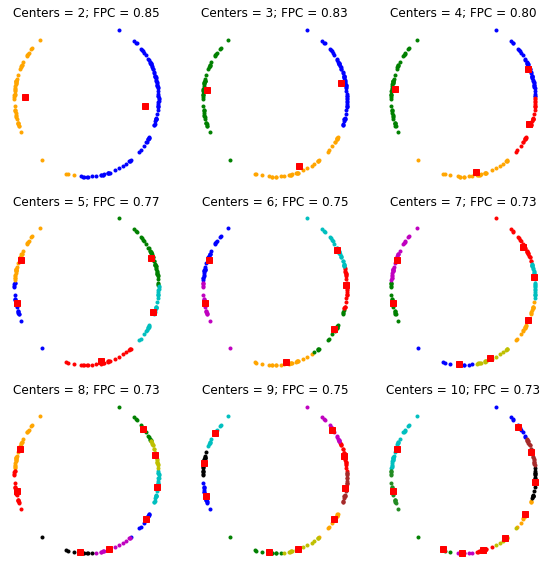

In [140]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X_iris)
lsa = TruncatedSVD(2, algorithm = 'arpack')
dtm_lsa = lsa.fit_transform(X_std)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)
a= pd.DataFrame(dtm_lsa, columns = ["component_1","component_2"])
a['targets']=y
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((a['component_1'], a['component_2']))
fpcs = []

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen'] 

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later plots
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(a['component_1'][cluster_membership == j],
                a['component_2'][cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()
fig1.savefig('iris_dataset.png')

## metrics (1.silhouette 2.AMI 3.Rand Index)

In [141]:
score = metrics.silhouette_score(X_scaled, y_kmeans3)
score

0.45994823920518635

In [142]:
score = metrics.silhouette_score(X_scaled, y_kmeans5)
score

0.34194697093163473

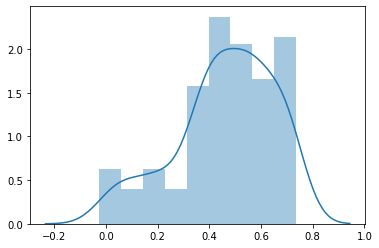

In [144]:
scores = metrics.silhouette_samples(X_scaled, y_kmeans3)
sns.distplot(scores);

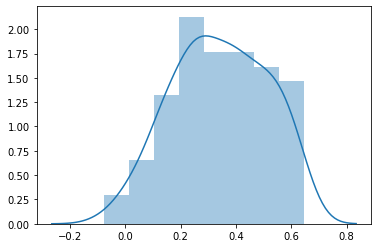

In [145]:
scores = metrics.silhouette_samples(X_scaled, y_kmeans5)
sns.distplot(scores)

In [156]:
ami = metrics.adjusted_mutual_info_score(y_kmeans3,iris.target)

In [157]:
ami

0.6552228479234871

In [158]:
ami_5 =metrics.adjusted_mutual_info_score(y_kmeans5,iris.target)

In [159]:
ami_5

0.5806781330526806

In [165]:
randindex = metrics.adjusted_rand_score(y_kmeans3,iris.target)

In [166]:
randindex

0.6201351808870379

In [167]:
randindex_5 = metrics.adjusted_rand_score(y_kmeans5,iris.target)

In [168]:
randindex_5

0.41808005832855233

# 4.4 Paper Works